In [1]:
# Import all packages required for Exploratory Data Analysis (EDA)

import pandas as pd              # to store tabular data
import numpy as np               # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns            # another popular data visualization tool

# to render graphics in notebook
%matplotlib inline               

plt.style.use('fivethirtyeight') # a popular data visualization theme

In [2]:
salary_ranges = pd.read_csv('Data/Salary_Ranges_by_Job_Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [3]:
# Check for empty values by examining the definition of the data set
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [4]:
# Check for count of empty values if any
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [5]:
# Get descriptive statistics on quantitative columns

# Applying salary_ranges.info(), we notice that the following columns are numeric
#     viz., Step - int64, 
#           Union Code - int64, 
#           Extended Step - int64

# Observation - These columns hold numbers but do not stand as numeric measures i.e. they represent something else
#     viz., Step - Not quantitative,
#           Union Code - Not quantitative, 
#           Extended Step - Not quantitative

salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [6]:
# Examine the Biweekly High Rate 
# - It denotes average 'high biweekly salary' for a department
# - It should be 'quantitative'; so remove '$' from it and make it 'float' type

salary_ranges['Biweekly High Rate'].describe()

count         1356
unique         593
top       $3460.00
freq            12
Name: Biweekly High Rate, dtype: object

In [7]:
salary_ranges['Biweekly High Rate'].head()

0      $0.00
1     $15.00
2     $25.00
3     $50.00
4    $100.00
Name: Biweekly High Rate, dtype: object

In [8]:
# Eliminate $ sign from 'Biweekly High Rate'
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].str.slice(1, -1)

In [9]:
# Convert the column from 'object' type to 'float' type
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
salary_ranges['Biweekly High Rate'].head()

0      0.0
1     15.0
2     25.0
3     50.0
4    100.0
Name: Biweekly High Rate, dtype: float64

In [10]:
# 'Grade' is a department code
# It should be 'qualitative' and of 'string' type

salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)
salary_ranges['Grade'].head()

0    00000
1    00000
2    00000
3    00000
4    00000
Name: Grade, dtype: object

In [11]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null float64
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 137.8+ KB


<b>Nominal Level</b><br/>
It belongs to <b>Quality </b>class.<br/>
It consists of data that are purely described by name. It has weakest structure among other levels.<br/>
Ex,<br/>
- Blood type like A, B, O, AB, etc
- Species of animals
- Names of people

Math Allowed:
- Count

Charts Allowed:
- Bar chart, Pie chart

In [12]:
# Level of each column

# SetID                 - 
# Job Code              - 
# Eff Date              -
# Sal End Date          -
# Salary SetID          -
# Sal Plan              -
# Grade                 - Nominal level
# Step                  -
# Biweekly High Rate    -
# Biweekly Low Rate     -
# Union Code            -
# Extended Step         -
# Pay Type              - 

In [13]:
# Math allowed
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
06870     9
07420     9
07170     9
Name: Grade, dtype: int64

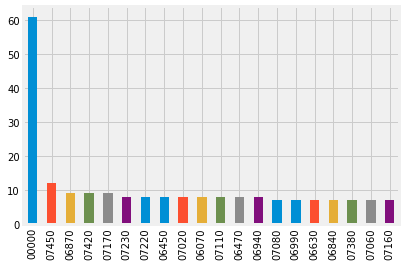

In [14]:
# Graphs that can be applied
# Show top 20 salary grades in decreasing order
salary_ranges['Grade'].value_counts().sort_values(ascending = False).head(20).plot.bar()

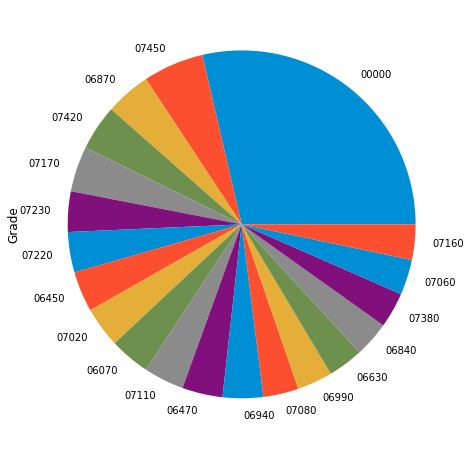

In [15]:
# Show top 8 salary grades in decreasing order
salary_ranges['Grade'].value_counts().sort_values(ascending = False).head(20).plot.pie(figsize=(8, 8))

<b>Ordinal Level</b><br/>
It belongs to <b>Quality class.</b><br/>
It has all properties of the nominal level with following additional properties:<br/>
- data can be naturally ordered
- means some data values can be better or greater than others

Math Allowed:<br/>
- Count, Comaprisons, Orderings, Median, Percentiles

Graphs Allowed:<br/>
- Bar chart, Pie chart, Stem and leaf plot, Box plot

Note:
The feature to be Ordinal
 - the values to represent a category
 - the datatype to be string

In [16]:
# Read Data on how much do customers enjoy SFO airport
customer = pd.read_csv('Data/2013_SFO_Customer_Survey.csv')

In [17]:
customer.shape

(3535, 95)

In [18]:
# Column Q7A_Art (i.e. 7 levels of rating) is 'feedback' on artwork and exhibition values:
# 1: Unacceptable
# 2: Below Average
# 3: Average
# 4: Good
# 5: Outstanding
# 6: Have Never Used or Visited
# 0: Blank

art_ratings = customer['Q7A_ART']
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [19]:
# Consider only ratings 1 to 5
art_ratings = art_ratings[(art_ratings>=1) & (art_ratings <=5)]

In [20]:
# Cast values as strings
art_ratings = art_ratings.astype(str)
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

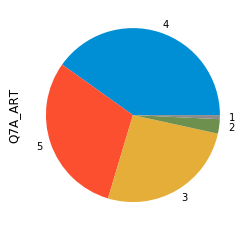

In [21]:
# Visualizations of customer feedback
art_ratings.value_counts().plot(kind='pie')

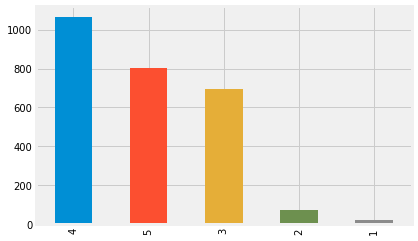

In [22]:
art_ratings.value_counts().plot(kind='bar')

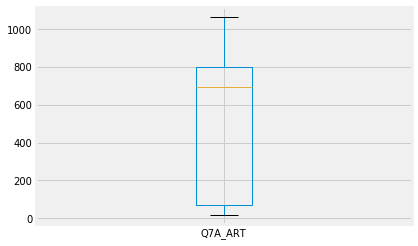

In [23]:
art_ratings.value_counts().plot(kind='box')

<b>Interval Level</b><br/>
It belongs to <b>Quantity </b>class.<br/>
We work with numerical data that has <u>ordering</u> like at the Ordinal level and has <u>meaningful differences</u> between values. So, we may not only order and compare but also <u>add</u> and <u>subtract</u> values.<br/>
Math Allowed:<br/>
- Addition, Subtraction, Arithmetic mean, Standard Deviation<br/>

Graphs Allowed:<br/>
- Histogram

In [24]:
# Operate on World-wide Climate Data

In [25]:
# Get Climate Data
climate = pd.read_csv('Data/GlobalLandTemperaturesByCity.csv')

# Consider USA data only
climate = climate.loc[climate['Country'] == 'United States']
climate = climate.iloc[0:1000]
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [26]:
# Remove rows with missing values
climate.dropna(axis=0, inplace=True)
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [27]:
# Check for rows with missing values, if any
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

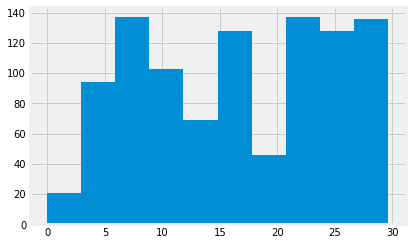

In [28]:
# Histogram is the ideal graph as data is huge
climate['AverageTemperature'].hist()

In [29]:
# From the above graph it appears that the average temperature is 20.
# We confirm it
climate['AverageTemperature'].describe()

count    999.000000
mean      16.552032
std        8.217198
min       -0.061000
25%        8.833000
50%       16.821000
75%       24.651500
max       29.690000
Name: AverageTemperature, dtype: float64

In [30]:
# Temperatures recorded in the USA by Century
# Convert the dt column to the 'date' type and extact year

climate['dt'] = pd.to_datetime(climate['dt'])
climate['dt'].head()

47555   1820-01-01
47556   1820-02-01
47557   1820-03-01
47558   1820-04-01
47559   1820-05-01
Name: dt, dtype: datetime64[ns]

In [31]:
climate['year'] = climate['dt'].map(lambda x: x.year)
climate['year'].head()

47555    1820
47556    1820
47557    1820
47558    1820
47559    1820
Name: year, dtype: int64

In [32]:
climate_sub_us = climate
climate_sub_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820


In [33]:
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: round(x/100 + 1), 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002476F41C2E8>,
      dtype=object)

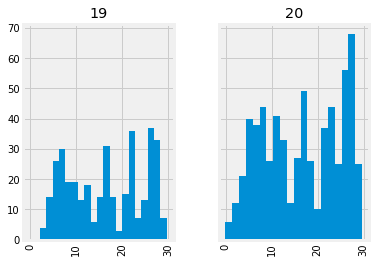

In [34]:
# Plot histograms of temperature, one for each century
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], sharex=True, sharey=True, bins=20)

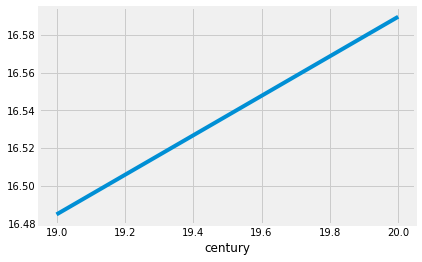

In [35]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [36]:
# Calculate the average temperature in each century
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()
century_changes

century
19    16.484735
20    16.589781
Name: AverageTemperature, dtype: float64

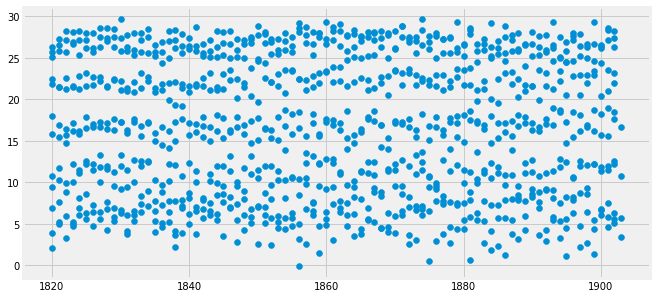

In [37]:
# Plot average temperature in each year
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

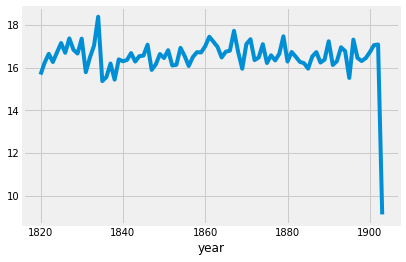

In [38]:
# Plot the average temperature group by year
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

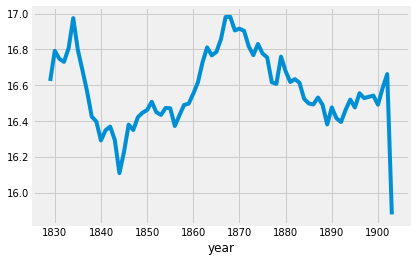

In [39]:
# Smooth the curve of the average temperature group by year using rolling mean
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()

Ratio Level<br/>
It belongs to <b>Quantity </b>class.<br/>
We work with numerical data that has degree of control and mathematics at our disposal. We inherit addition and subtraction from the interval level, but now we have a notion of true zero which gives us the ability to multiply and divide values<br/>
Math Allowed:<br/>
- Multiplication, Division<br/>

Graphs Allowed:<br/>
- Histogram

Text(0.5, 1.0, 'Top 20 Grade by Mean Biweekly High Rate')

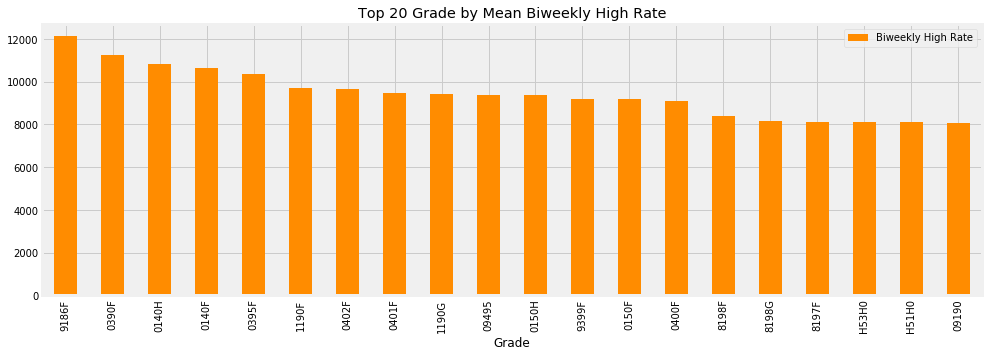

In [40]:
# Show top 20 highest paid Departments

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Bottom 20 Grade by Mean Biweekly High Rate')

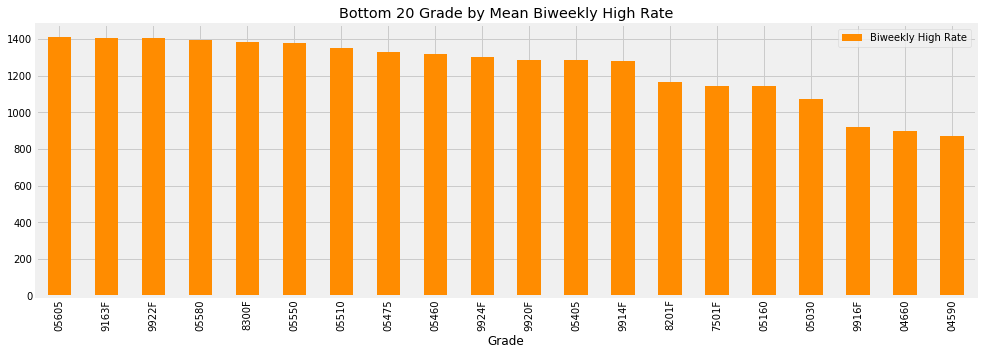

In [41]:
# Show the bottom 20 lowest paid departments

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Bottom 20 Grade by Mean Biweekly High Rate')

In [42]:
# Ratio of highest paid to the lowest paid
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate', ascending=False)

In [43]:
# The highest paid gets about 14 times the lowest paid
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

13.93183908045977